In [3]:
from time import time

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.mldata import fetch_mldata

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
plt.style.use('ggplot')

####################################################################
# Download the data (if not present); load it as numpy arrays
dataset_name = 'covtype.binary'
covtype = fetch_mldata(dataset_name)
covtype.data = covtype.data.toarray()  # convert to dense

####################################################################
# Extract features
X_train, X_test, y_train, y_test = \
    train_test_split(covtype.data[:50000, :], covtype.target[:50000],
                     train_size=10000, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####################################################################
# SVM classfication (Question 1)

from sklearn.svm import SVC, LinearSVC

print("Fitting SVC rbf on %d samples..." % X_train.shape[0])
t0 = time()
# TODO
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))

print("Predicting with SVC rbf on %d samples..." % X_test.shape[0])
t1 = time()
# TODO
accuracy_kernel=clf.score(X_test,y_test)
print("done in %0.3fs" % (time() - t1))
timing_kernel = time() - t0
print("classification accuracy: %0.3f" % accuracy_kernel)
print'timing_kernel: ',str(timing_kernel)

# TODO with LinearSVC
print("Fitting SVC linear on %d samples..." % X_train.shape[0])
t0 = time()
# TODO
clf = LinearSVC(dual=False)
clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))

print("Predicting with SVC linear on %d samples..." % X_test.shape[0])
t1 = time()
# TODO
accuracy_kernel=clf.score(X_test,y_test)
print("done in %0.3fs" % (time() - t1))
timing_linear = time() - t0
print("classification accuracy: %0.3f" % accuracy_kernel)
print'timing_linear: ',str(timing_linear)


Fitting SVC rbf on 10000 samples...
done in 3.653s
Predicting with SVC rbf on 40000 samples...
done in 9.112s
classification accuracy: 0.875
timing_kernel:  12.7665588856
Fitting SVC linear on 10000 samples...
done in 0.184s
Predicting with SVC linear on 40000 samples...
done in 0.005s
classification accuracy: 0.863
timing_linear:  0.189764976501


done q23


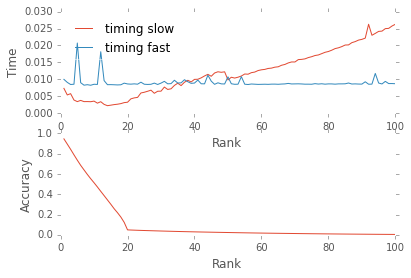

In [9]:
%matplotlib inline
####################################################################
# Gram approximation
from TP_kernel_approx_source import rank_trunc, nystrom, random_features

p = 200
r_noise = 100
r_signal = 20

intensity = 50

rng = np.random.RandomState(42)
X_noise = rng.randn(r_noise, p)
X_signal = rng.randn(r_signal, p)

gram_signal = np.dot(X_noise.T, X_noise) + intensity * np.dot(X_signal.T,
                                                              X_signal)
n_ranks = 100
ranks = np.arange(1, n_ranks + 1)
timing_fast = np.zeros(n_ranks)
timing_slow = np.zeros(n_ranks)
accuracy = np.zeros(n_ranks)

# TODO : Question 2 Implement rank_trunc function in source file.
# TODO : Question 3 Evaluate accuracy with Frobenius norm as a function
# of the rank for both svd solvers

# Use linalg.norm(A, 'fro') to compute Frobenius norm of A
for k, rank in enumerate(ranks):
    tf=time()
    gk,_,_=rank_trunc(gram_signal,rank)
    timing_fast[k]=time()-tf
    tsl=time()
    gks,_,_=rank_trunc(gram_signal,rank,fast=False)
    timing_slow[k]=time()-tsl
    accuracy[k]= linalg.norm(gram_signal-gk,ord='fro')/linalg.norm(gram_signal,ord='fro')
#    accuracy[k]= linalg.norm(gram_signal-gks,ord='fro')/linalg.norm(gram_signal,ord='fro')

print("done q23")
#plt.plot(accuracy,'o-')
#plt.title('Accuracy of approximasion by truncated SVD as a function of rank')
#plt.figure(2)
#plt.plot(ts,'o-')
#plt.title('Computation time using fast/slow truncSVD as a function of rank')

#plt.savefig('q2.png')
####################################################################
# Display
opt={'figroot':'report/figs/'}

fig, axes = plt.subplots(ncols=1, nrows=2)
ax1, ax2 = axes.ravel()

ax1.plot(ranks, timing_fast, '-')
ax1.plot(ranks, timing_slow, '-')

ax1.set_xlabel('Rank')
ax1.set_ylabel('Time')
ax1.legend({'timing fast','timing slow'},loc=2)
ax2.plot(ranks, accuracy, '-')
ax2.set_xlabel('Rank')
ax2.set_ylabel('Accuracy')
# plt.tight_layout()
plt.savefig(opt['figroot']+'q23-new.png')
plt.show()

The Nystrom approximation consists of doing .... $$F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx$$